In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression


In [26]:
df = pd.read_csv("../../data/processed/blinkit_transformed.csv")
df['order_date'] = pd.to_datetime(df['outlet_establishment_year'], format="%Y")


In [3]:
ts = df.groupby('order_date')['total_sales'].sum()
ts


order_date
1998-01-01    204522.2570
2000-01-01    131809.0156
2010-01-01    132113.3698
2011-01-01     78131.5646
2012-01-01    130476.8598
2015-01-01    130942.7782
2017-01-01    133103.9070
2020-01-01    129103.9564
2022-01-01    131477.7724
Name: total_sales, dtype: float64

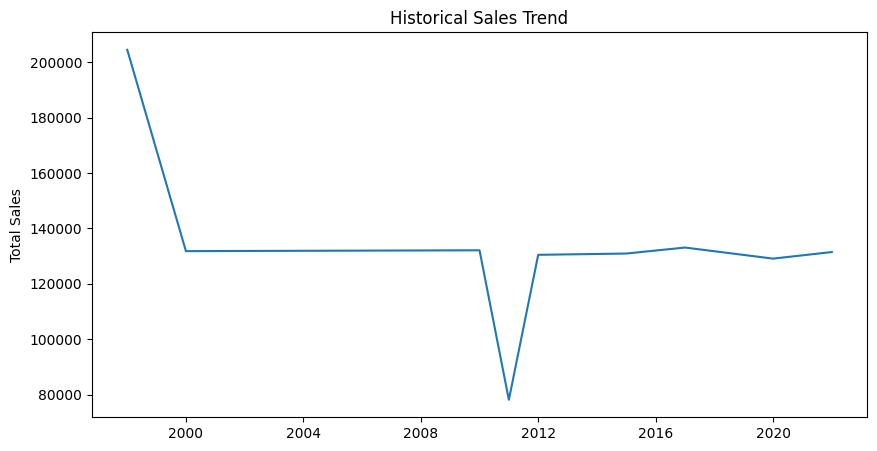

In [4]:
plt.figure(figsize=(10,5))
plt.plot(ts)
plt.title("Historical Sales Trend")
plt.ylabel("Total Sales")
plt.show()


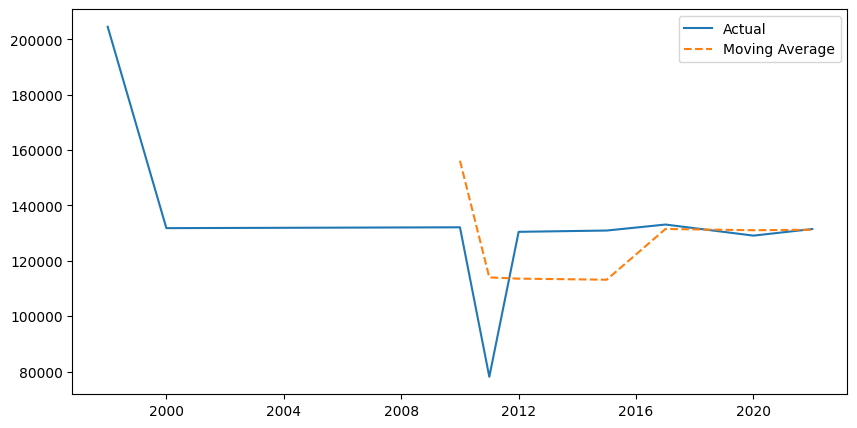

In [5]:
ts_ma = ts.rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(ts, label="Actual")
plt.plot(ts_ma, label="Moving Average", linestyle="--")
plt.legend()
plt.show()


In [6]:
X = np.arange(len(ts)).reshape(-1,1)
y = ts.values

model = LinearRegression()
model.fit(X, y)

future_X = np.arange(len(ts)+4).reshape(-1,1)
future_sales = model.predict(future_X)


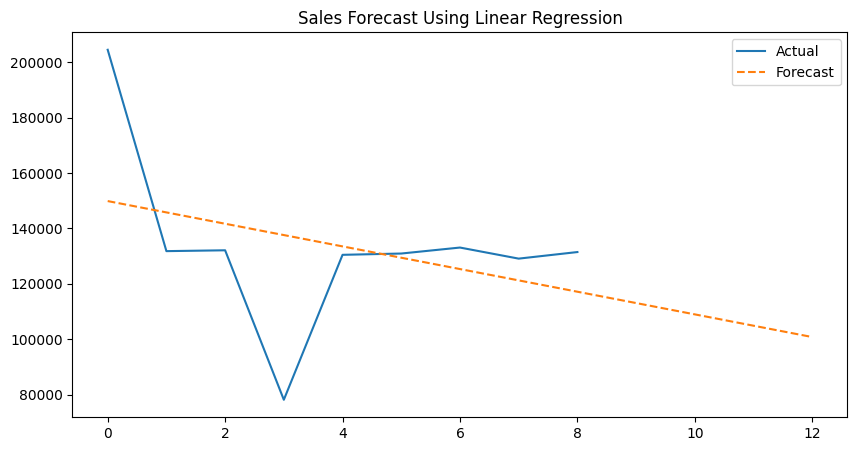

In [7]:
plt.figure(figsize=(10,5))
plt.plot(ts.values, label="Actual")
plt.plot(future_sales, linestyle="--", label="Forecast")
plt.title("Sales Forecast Using Linear Regression")
plt.legend()
plt.show()


In [8]:
y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

mae, rmse


(19133.318029629634, np.float64(28184.59478959716))

In [9]:
df['month'] = df['order_date'].dt.month
monthly_ts = df.groupby('month')['total_sales'].mean()
monthly_ts


month
1    140.992782
Name: total_sales, dtype: float64

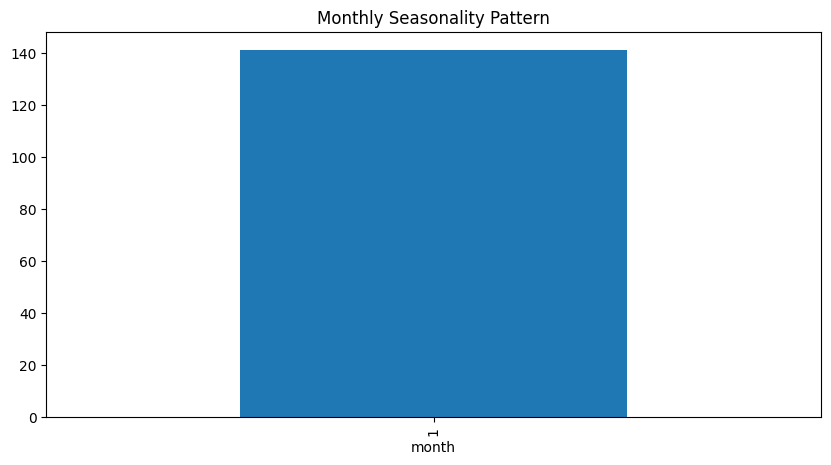

In [10]:
plt.figure(figsize=(10,5))
monthly_ts.plot(kind='bar')
plt.title("Monthly Seasonality Pattern")
plt.show()


In [11]:
forecast_df = pd.DataFrame({
    "Year_Index": range(len(future_sales)),
    "Forecast_Sales": future_sales
})

forecast_df.to_csv("../../data/processed/forecast_results.csv", index=False)


In [12]:
train_size = int(len(ts) * 0.8)

train = ts[:train_size]
test = ts[train_size:]


In [13]:
X_train = np.arange(len(train)).reshape(-1,1)
y_train = train.values

X_test = np.arange(len(train), len(ts)).reshape(-1,1)
y_test = test.values

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred_test = model.predict(X_test)


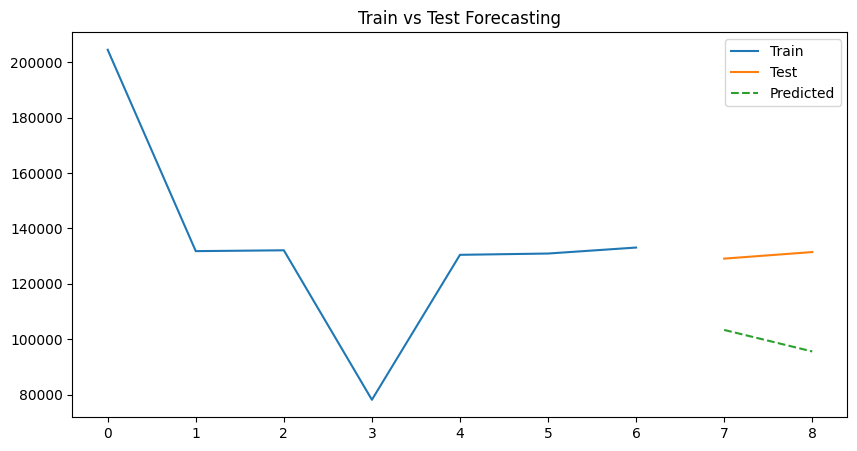

In [15]:
plt.figure(figsize=(10,5))
plt.plot(train.values, label='Train')
plt.plot(range(len(train), len(ts)), test.values, label='Test')
plt.plot(range(len(train), len(ts)), y_pred_test, label='Predicted', linestyle='--')
plt.legend()
plt.title("Train vs Test Forecasting")
plt.show()


In [16]:
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 30823.333992857144
RMSE: 31238.018018745337


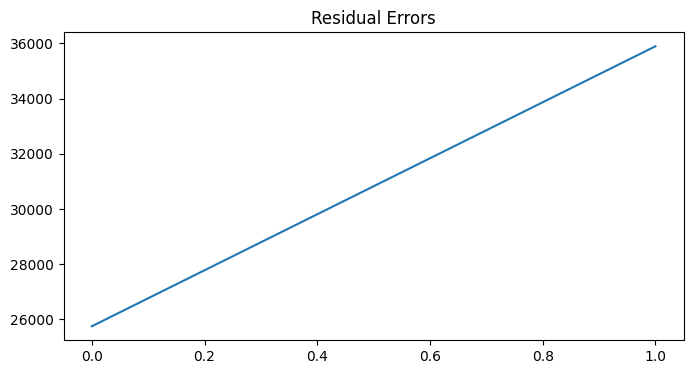

In [17]:
residuals = y_test - y_pred_test

plt.figure(figsize=(8,4))
plt.plot(residuals)
plt.title("Residual Errors")
plt.show()


In [18]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

trend = df.groupby('year')['total_sales'].sum()
seasonality = df.groupby('month')['total_sales'].mean()


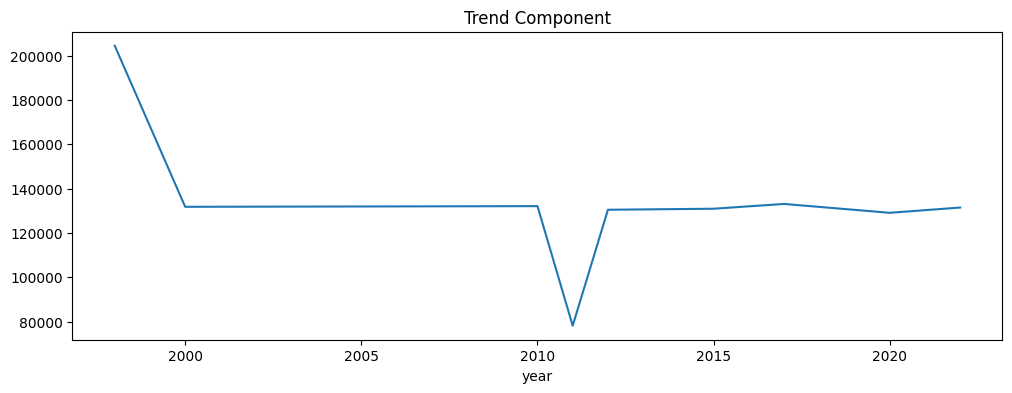

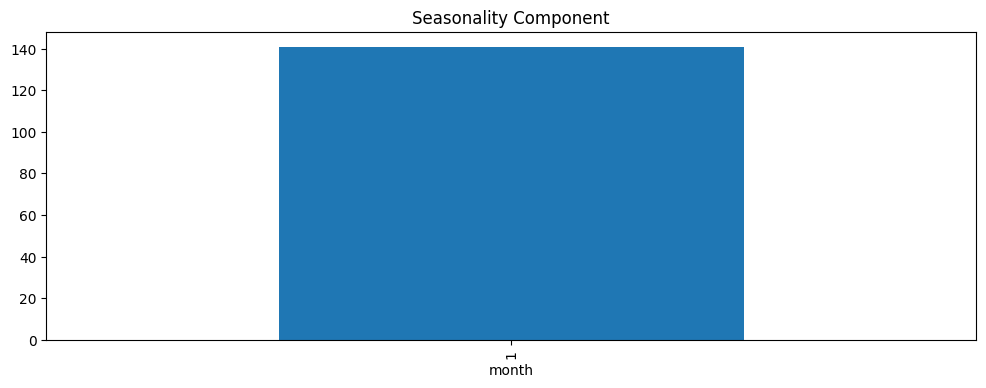

In [19]:
plt.figure(figsize=(12,4))
trend.plot(title="Trend Component")
plt.show()

plt.figure(figsize=(12,4))
seasonality.plot(kind='bar', title="Seasonality Component")
plt.show()


In [20]:
base_forecast = future_sales

best_case = base_forecast * 1.15   # 15% growth
worst_case = base_forecast * 0.85  # 15% drop


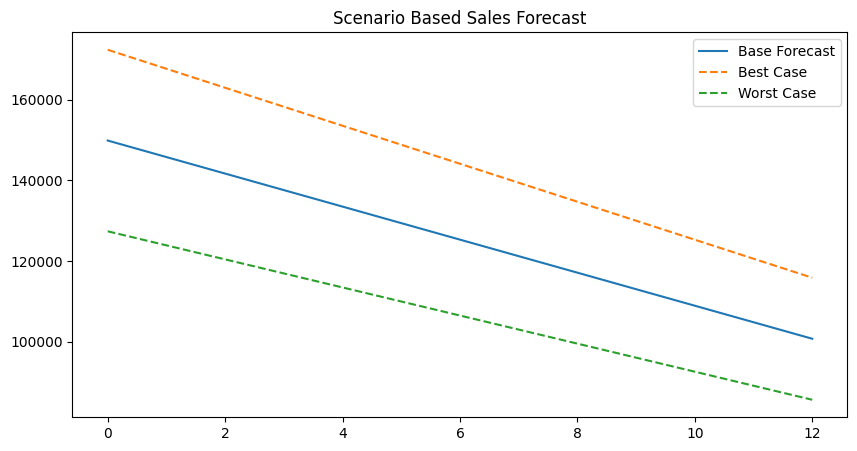

In [21]:
plt.figure(figsize=(10,5))
plt.plot(base_forecast, label="Base Forecast")
plt.plot(best_case, linestyle='--', label="Best Case")
plt.plot(worst_case, linestyle='--', label="Worst Case")
plt.legend()
plt.title("Scenario Based Sales Forecast")
plt.show()


In [22]:
product_ts = df.groupby(['order_date','item_type'])['total_sales'].sum().reset_index()

top_category = product_ts.groupby('item_type')['total_sales'].sum().idxmax()

cat_ts = product_ts[product_ts['item_type']==top_category]


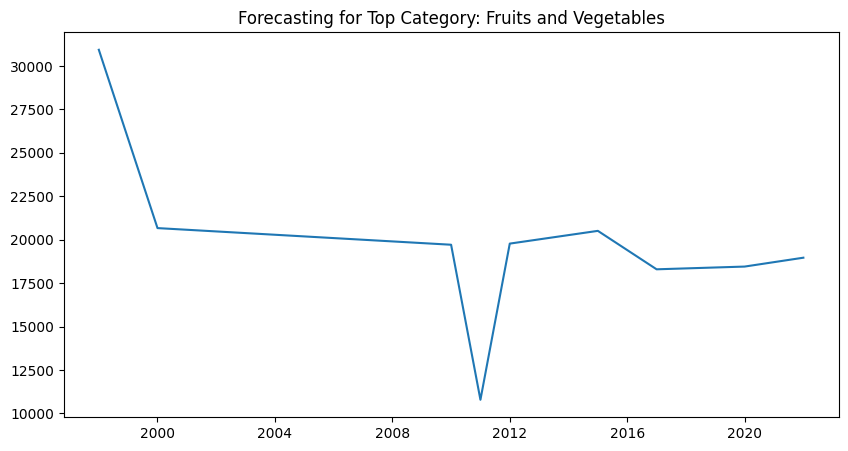

In [23]:
plt.figure(figsize=(10,5))
plt.plot(cat_ts['order_date'], cat_ts['total_sales'])
plt.title(f"Forecasting for Top Category: {top_category}")
plt.show()
